# MARKOWITZ PORTFOLIO

**Taking last 1 year data. To evaluate markowitz portfolio**

In [2]:
#import python libraries
import numpy as np # Numerical Calculations
import pandas as pd # Data Processing
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns # Data Visualisation
import yfinance as yf
get_ipython().run_line_magic('matplotlib', 'inline')

import array
import datetime as dt
import math


## Data Extraction & Data Analysis

**I have chosen this list of stocks, lets see which stock is good and eligible**

In [3]:
stocks = ['ICICIBANK.NS', 'TATASTEEL.NS', 'SPARC.NS', 'TCS.NS', 'EVERESTIND.NS', 'COFORGE.NS', 'APOLLOTYRE.NS', 'SJVN.NS', 'VAKRANGEE.NS', 'AUROPHARMA.NS', 'JUBLFOOD.NS', 'HDFCBANK.NS', 'RELINFRA.NS', 
         'SBIN.NS', 'WOCKPHARMA.NS', 'INDUSINDBK.NS', 'SUNTV.NS', 'M&MFIN.NS', 'BAJFINANCE.NS', 'ASIANPAINT.NS', 'SRTRANSFIN.NS', 'MAGMA.NS', 'NTPC.NS']

In [7]:
start = dt.datetime.today() - dt.timedelta(365)  
end = dt.datetime.today() -dt.timedelta(0)

In [8]:
print(start, end)

2020-09-12 13:10:06.559405 2021-09-12 13:10:06.559405


In [10]:
Company = pd.DataFrame()

In [11]:
for ticker in stocks:
    Company[ticker] = yf.download(ticker, start, end)["Adj Close"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [12]:
Company.head()


,ICICIBANK.NS,TATASTEEL.NS,SPARC.NS,TCS.NS,EVERESTIND.NS,COFORGE.NS,APOLLOTYRE.NS,SJVN.NS,VAKRANGEE.NS,AUROPHARMA.NS,...,SBIN.NS,WOCKPHARMA.NS,INDUSINDBK.NS,SUNTV.NS,M&MFIN.NS,BAJFINANCE.NS,ASIANPAINT.NS,SRTRANSFIN.NS,MAGMA.NS,NTPC.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-14,362.638184,395.792786,176.699997,2458.692139,217.540390,2140.556152,123.722488,21.243092,26.366556,791.911133,...,196.684113,291.250000,606.360046,490.673981,132.133194,3435.149170,2018.113403,624.137939,38.250000,83.230759
2020-09-15,370.465240,396.379669,178.699997,2458.692139,219.459869,2130.770996,125.890465,21.243092,26.119678,814.440491,...,198.319016,296.950012,630.292053,487.234802,136.737320,3507.731934,2004.551392,639.730286,37.250000,83.459785
2020-09-16,373.606079,395.743896,179.399994,2470.140137,219.705948,2167.229980,126.728096,21.426220,25.922174,827.669678,...,196.386856,299.049988,618.599731,470.726685,135.895706,3515.818848,1999.136353,645.614197,37.799999,84.592079
2020-09-17,367.922699,389.973053,176.649994,2428.641846,215.768570,2242.880127,132.591492,21.838264,25.971550,806.483154,...,193.662003,296.149994,614.320801,465.813538,134.757065,3466.348877,1995.013184,641.691528,37.650002,83.648499
2020-09-18,368.471100,386.843079,179.300003,2417.736816,213.455368,2179.300049,128.797516,21.472004,26.662807,823.690979,...,190.838089,305.700012,610.191162,476.082001,131.935181,3469.194336,2015.331543,634.091553,37.500000,85.441315


In [13]:

Company.describe()

,ICICIBANK.NS,TATASTEEL.NS,SPARC.NS,TCS.NS,EVERESTIND.NS,COFORGE.NS,APOLLOTYRE.NS,SJVN.NS,VAKRANGEE.NS,AUROPHARMA.NS,...,SBIN.NS,WOCKPHARMA.NS,INDUSINDBK.NS,SUNTV.NS,M&MFIN.NS,BAJFINANCE.NS,ASIANPAINT.NS,SRTRANSFIN.NS,MAGMA.NS,NTPC.NS
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,568.550607,841.955297,202.603252,3045.314964,320.490617,3177.573577,199.164122,24.877883,44.820488,886.933756,...,334.807423,474.854064,903.227078,487.163935,163.816165,5204.432126,2592.634577,1184.381696,100.808130,99.598772
std,100.691804,346.343152,42.169661,311.863700,76.494549,934.795997,34.961756,2.652279,11.674515,83.625443,...,86.763123,108.238294,148.430203,38.301682,24.327059,1036.157175,361.747356,273.449424,53.454071,12.241941
min,334.719940,336.372528,142.149994,2301.631348,191.602875,2088.947266,114.262222,19.507246,24.583647,679.638611,...,174.736740,267.899994,487.844452,408.870422,112.330551,3024.013428,1905.990479,552.942261,32.450001,74.542946
25%,507.414253,602.651154,170.487499,2788.726501,276.871841,2476.387146,178.303761,23.296421,36.127490,829.808258,...,265.672180,418.074997,848.839386,461.041718,151.945728,4790.920776,2366.522156,1027.261322,43.162501,89.758194
50%,594.110443,715.684143,185.024994,3093.197021,307.952545,2787.730103,213.350403,25.350000,46.050705,899.080200,...,356.335129,494.425003,952.428619,489.494049,161.243103,5316.908691,2558.633667,1309.237183,116.674999,100.248039
75%,641.085373,1131.161407,232.612495,3215.298767,370.126274,3918.336060,224.525063,26.900000,52.957062,955.887268,...,419.575012,529.387512,1008.551865,519.360306,175.946579,5987.000977,2957.899963,1384.097534,149.925003,110.888140
max,725.150024,1519.400024,305.250000,3852.000000,505.067749,5281.000000,255.279236,29.650000,68.963860,1045.701538,...,456.950012,786.650024,1104.304688,575.099060,218.571777,7524.500000,3346.350098,1494.669678,194.399994,118.099098


In [14]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2020-09-14 to 2021-09-09
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ICICIBANK.NS   246 non-null    float64
 1   TATASTEEL.NS   246 non-null    float64
 2   SPARC.NS       246 non-null    float64
 3   TCS.NS         246 non-null    float64
 4   EVERESTIND.NS  246 non-null    float64
 5   COFORGE.NS     246 non-null    float64
 6   APOLLOTYRE.NS  246 non-null    float64
 7   SJVN.NS        246 non-null    float64
 8   VAKRANGEE.NS   246 non-null    float64
 9   AUROPHARMA.NS  246 non-null    float64
 10  JUBLFOOD.NS    246 non-null    float64
 11  HDFCBANK.NS    246 non-null    float64
 12  RELINFRA.NS    246 non-null    float64
 13  SBIN.NS        246 non-null    float64
 14  WOCKPHARMA.NS  246 non-null    float64
 15  INDUSINDBK.NS  246 non-null    float64
 16  SUNTV.NS       246 non-null    float64
 17  M&MFIN.NS      246 non-null    floa

In [15]:
Comp_return = Company.pct_change()
Comp_return

,ICICIBANK.NS,TATASTEEL.NS,SPARC.NS,TCS.NS,EVERESTIND.NS,COFORGE.NS,APOLLOTYRE.NS,SJVN.NS,VAKRANGEE.NS,AUROPHARMA.NS,...,SBIN.NS,WOCKPHARMA.NS,INDUSINDBK.NS,SUNTV.NS,M&MFIN.NS,BAJFINANCE.NS,ASIANPAINT.NS,SRTRANSFIN.NS,MAGMA.NS,NTPC.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-15,0.021584,0.001483,0.011319,0.000000,0.008824,-0.004571,0.017523,0.000000,-0.009363,0.028449,...,0.008312,0.019571,0.039468,-0.007009,0.034845,0.021129,-0.006720,0.024982,-0.026144,0.002752
2020-09-16,0.008478,-0.001604,0.003917,0.004656,0.001121,0.017111,0.006654,0.008621,-0.007562,0.016243,...,-0.009743,0.007072,-0.018551,-0.033881,-0.006155,0.002305,-0.002701,0.009197,0.014765,0.013567
2020-09-17,-0.015212,-0.014582,-0.015329,-0.016800,-0.017921,0.034906,0.046268,0.019231,0.001905,-0.025598,...,-0.013875,-0.009697,-0.006917,-0.010437,-0.008379,-0.014071,-0.002062,-0.006076,-0.003968,-0.011154
2020-09-18,0.001491,-0.008026,0.015001,-0.004490,-0.010721,-0.028348,-0.028614,-0.016772,0.026616,0.021337,...,-0.014582,0.032247,-0.006722,0.022044,-0.020941,0.000821,0.010185,-0.011844,-0.003984,0.021433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-03,-0.001172,0.013017,-0.017854,0.001381,-0.004796,0.016538,0.006316,0.001859,-0.006353,0.014796,...,0.003839,0.001785,-0.006286,0.006669,-0.007214,0.003327,0.011267,0.005212,-0.010321,0.004292
2021-09-06,-0.004349,-0.004606,0.001668,0.002590,-0.008629,0.007200,-0.006052,-0.001855,0.136829,-0.004156,...,-0.000811,-0.010099,-0.011756,0.000713,0.018771,-0.002266,-0.006964,-0.002667,0.035513,-0.004701
2021-09-07,-0.005893,-0.005776,-0.023143,-0.009372,-0.009722,-0.019210,-0.015562,-0.007435,-0.026997,-0.011196,...,-0.004524,-0.014282,0.009375,-0.013036,0.011590,-0.006535,0.006243,-0.001225,0.010615,-0.005152


In [16]:
Comp_return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2020-09-14 to 2021-09-09
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ICICIBANK.NS   245 non-null    float64
 1   TATASTEEL.NS   245 non-null    float64
 2   SPARC.NS       245 non-null    float64
 3   TCS.NS         245 non-null    float64
 4   EVERESTIND.NS  245 non-null    float64
 5   COFORGE.NS     245 non-null    float64
 6   APOLLOTYRE.NS  245 non-null    float64
 7   SJVN.NS        245 non-null    float64
 8   VAKRANGEE.NS   245 non-null    float64
 9   AUROPHARMA.NS  245 non-null    float64
 10  JUBLFOOD.NS    245 non-null    float64
 11  HDFCBANK.NS    245 non-null    float64
 12  RELINFRA.NS    245 non-null    float64
 13  SBIN.NS        245 non-null    float64
 14  WOCKPHARMA.NS  245 non-null    float64
 15  INDUSINDBK.NS  245 non-null    float64
 16  SUNTV.NS       245 non-null    float64
 17  M&MFIN.NS      245 non-null    floa

In [17]:
describe = Comp_return.describe()
describe

,ICICIBANK.NS,TATASTEEL.NS,SPARC.NS,TCS.NS,EVERESTIND.NS,COFORGE.NS,APOLLOTYRE.NS,SJVN.NS,VAKRANGEE.NS,AUROPHARMA.NS,...,SBIN.NS,WOCKPHARMA.NS,INDUSINDBK.NS,SUNTV.NS,M&MFIN.NS,BAJFINANCE.NS,ASIANPAINT.NS,SRTRANSFIN.NS,MAGMA.NS,NTPC.NS
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,...,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0.003032,0.005652,0.002477,0.001876,0.003224,0.003945,0.002636,0.001052,0.002814,-0.000066,...,0.003473,0.002050,0.002431,0.000252,0.001380,0.003418,0.002213,0.003593,0.007005,0.001457
std,0.021484,0.026453,0.029397,0.014686,0.025951,0.028016,0.027621,0.014417,0.039989,0.020115,...,0.022718,0.034988,0.028173,0.022193,0.028605,0.023137,0.017262,0.030054,0.036872,0.017530
min,-0.051008,-0.083208,-0.075130,-0.054793,-0.070984,-0.073053,-0.089485,-0.051429,-0.099783,-0.078552,...,-0.068414,-0.142440,-0.085801,-0.080150,-0.113790,-0.074154,-0.045187,-0.114793,-0.070999,-0.060241
25%,-0.010487,-0.010333,-0.014606,-0.005337,-0.012217,-0.012399,-0.011607,-0.006536,-0.021003,-0.011196,...,-0.008265,-0.016353,-0.010799,-0.011473,-0.013417,-0.009375,-0.007537,-0.012590,-0.016814,-0.008687
50%,0.002931,0.005568,-0.001307,0.001567,0.002421,0.005224,0.001679,0.000000,-0.002868,0.000163,...,0.002153,-0.001966,-0.000705,-0.001207,0.000000,0.000821,0.000976,0.001315,0.001131,0.000000
75%,0.013599,0.020506,0.017143,0.008470,0.019168,0.016228,0.015431,0.007905,0.018057,0.012015,...,0.014094,0.016715,0.014686,0.013017,0.018771,0.015581,0.010185,0.018025,0.031383,0.012420
max,0.124395,0.077593,0.191725,0.072262,0.087404,0.174021,0.086702,0.051587,0.199063,0.080970,...,0.107012,0.200000,0.147146,0.063758,0.081520,0.088887,0.085400,0.162227,0.199488,0.054040


In [18]:
avg_daily_ret = describe.loc['mean',:]
avg_daily_ret

ICICIBANK.NS     0.003032
TATASTEEL.NS     0.005652
SPARC.NS         0.002477
TCS.NS           0.001876
EVERESTIND.NS    0.003224
COFORGE.NS       0.003945
APOLLOTYRE.NS    0.002636
SJVN.NS          0.001052
VAKRANGEE.NS     0.002814
AUROPHARMA.NS   -0.000066
JUBLFOOD.NS      0.002512
HDFCBANK.NS      0.001768
RELINFRA.NS      0.005040
SBIN.NS          0.003473
WOCKPHARMA.NS    0.002050
INDUSINDBK.NS    0.002431
SUNTV.NS         0.000252
M&MFIN.NS        0.001380
BAJFINANCE.NS    0.003418
ASIANPAINT.NS    0.002213
SRTRANSFIN.NS    0.003593
MAGMA.NS         0.007005
NTPC.NS          0.001457
Name: mean, dtype: float64

In [19]:
Annual_Covar_Mat = Comp_return.loc[:,:].cov()*21
Annual_Covar_Mat

,ICICIBANK.NS,TATASTEEL.NS,SPARC.NS,TCS.NS,EVERESTIND.NS,COFORGE.NS,APOLLOTYRE.NS,SJVN.NS,VAKRANGEE.NS,AUROPHARMA.NS,...,SBIN.NS,WOCKPHARMA.NS,INDUSINDBK.NS,SUNTV.NS,M&MFIN.NS,BAJFINANCE.NS,ASIANPAINT.NS,SRTRANSFIN.NS,MAGMA.NS,NTPC.NS
ICICIBANK.NS,0.009693,0.004197,0.002885,0.000898,0.003269,0.001286,0.005338,0.001230,0.002277,0.002148,...,0.007200,0.002127,0.008349,0.002615,0.006290,0.005922,0.001600,0.006162,0.002649,0.002205
TATASTEEL.NS,0.004197,0.014695,0.004703,0.001992,0.005359,0.003262,0.005624,0.001701,0.003958,0.003627,...,0.005671,0.004394,0.005115,0.004511,0.006043,0.004580,0.000669,0.004915,0.002484,0.003862
SPARC.NS,0.002885,0.004703,0.018148,0.002015,0.004849,0.001968,0.005167,0.001767,0.002783,0.005369,...,0.002539,0.006205,0.003419,0.005142,0.004768,0.002181,0.000697,0.004422,0.002582,0.002932
TCS.NS,0.000898,0.001992,0.002015,0.004529,0.001142,0.003449,0.001025,0.000456,0.002232,0.002127,...,0.000652,0.002084,0.001004,0.001073,0.000831,0.000434,0.000964,0.000598,0.001162,0.000641
EVERESTIND.NS,0.003269,0.005359,0.004849,0.001142,0.014143,0.002001,0.004901,0.001564,0.002787,0.002505,...,0.003930,0.004180,0.004784,0.003924,0.004332,0.002932,0.001101,0.002960,0.004176,0.002722
COFORGE.NS,0.001286,0.003262,0.001968,0.003449,0.002001,0.016482,0.001695,0.001387,0.004009,0.002605,...,0.001345,0.003661,0.001952,0.002383,0.002757,0.001640,0.001781,0.001982,0.003130,0.002214
APOLLOTYRE.NS,0.005338,0.005624,0.005167,0.001025,0.004901,0.001695,0.016021,0.002979,0.005367,0.002533,...,0.005837,0.004486,0.008017,0.005562,0.007681,0.006288,0.001017,0.005309,0.004068,0.003746
SJVN.NS,0.001230,0.001701,0.001767,0.000456,0.001564,0.001387,0.002979,0.004365,0.001575,0.000617,...,0.001614,0.002107,0.001138,0.001950,0.002356,0.001027,0.000490,0.001458,0.001985,0.002099
VAKRANGEE.NS,0.002277,0.003958,0.002783,0.002232,0.002787,0.004009,0.005367,0.001575,0.033581,0.001409,...,0.001843,0.005759,0.003669,0.003065,0.005172,0.003735,0.001930,0.003735,0.001934,0.002954
AUROPHARMA.NS,0.002148,0.003627,0.005369,0.002127,0.002505,0.002605,0.002533,0.000617,0.001409,0.008497,...,0.001915,0.003532,0.002081,0.002937,0.003229,0.001263,0.000745,0.002448,0.001867,0.001565


In [20]:
Weight = np.array([1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23,1/23])

In [21]:
Weight.T

array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
       0.04347826, 0.04347826, 0.04347826])

In [22]:
port_var=np.dot(Weight.T,np.dot(Annual_Covar_Mat,Weight))
port_var

0.003657287558452597

In [23]:
port_standard_deviation=np.sqrt(port_var)
port_standard_deviation

0.06047551205614217

In [24]:
portfolio_return = np.sum(avg_daily_ret*Weight)*21
portfolio_return

0.057735601052213724

In [27]:
percent_var=str(round(port_var,2)*100)+'%'
percent_std=str(round(port_standard_deviation,2)*100)+'%'
percent_ret=str(round(portfolio_return ,2)*100)+'%'
print("Expected return: "+percent_ret)
print("Standard Deviation : "+percent_std)
print("Variance: "+percent_var)

Expected return: 6.0%
Standard Deviation : 6.0%
Variance: 0.0%


In [ ]:
#pip install PyPortfolioOpt

### Building Markowitz Portfolio

In [28]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [29]:
m_r = expected_returns.mean_historical_return(Company)
S   = risk_models.sample_cov(Company)


In [30]:
ef= EfficientFrontier(m_r,S)
weight= ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ICICIBANK.NS', 0.0), ('TATASTEEL.NS', 0.37787), ('SPARC.NS', 0.0), ('TCS.NS', 0.0), ('EVERESTIND.NS', 0.0), ('COFORGE.NS', 0.05113), ('APOLLOTYRE.NS', 0.0), ('SJVN.NS', 0.0), ('VAKRANGEE.NS', 0.0), ('AUROPHARMA.NS', 0.0), ('JUBLFOOD.NS', 0.0), ('HDFCBANK.NS', 0.0), ('RELINFRA.NS', 0.06158), ('SBIN.NS', 0.0), ('WOCKPHARMA.NS', 0.0), ('INDUSINDBK.NS', 0.0), ('SUNTV.NS', 0.0), ('M&MFIN.NS', 0.0), ('BAJFINANCE.NS', 0.0), ('ASIANPAINT.NS', 0.21409), ('SRTRANSFIN.NS', 0.0), ('MAGMA.NS', 0.29534), ('NTPC.NS', 0.0)])
Expected annual return: 254.9%
Annual volatility: 27.3%
Sharpe Ratio: 9.27


(2.5485589614282236, 0.2728541108956185, 9.267072990502)

In [31]:

clean = pd.DataFrame.from_dict(cleaned_weights, orient='index')

In [32]:
print(clean)

                     0
ICICIBANK.NS   0.00000
TATASTEEL.NS   0.37787
SPARC.NS       0.00000
TCS.NS         0.00000
EVERESTIND.NS  0.00000
COFORGE.NS     0.05113
APOLLOTYRE.NS  0.00000
SJVN.NS        0.00000
VAKRANGEE.NS   0.00000
AUROPHARMA.NS  0.00000
JUBLFOOD.NS    0.00000
HDFCBANK.NS    0.00000
RELINFRA.NS    0.06158
SBIN.NS        0.00000
WOCKPHARMA.NS  0.00000
INDUSINDBK.NS  0.00000
SUNTV.NS       0.00000
M&MFIN.NS      0.00000
BAJFINANCE.NS  0.00000
ASIANPAINT.NS  0.21409
SRTRANSFIN.NS  0.00000
MAGMA.NS       0.29534
NTPC.NS        0.00000


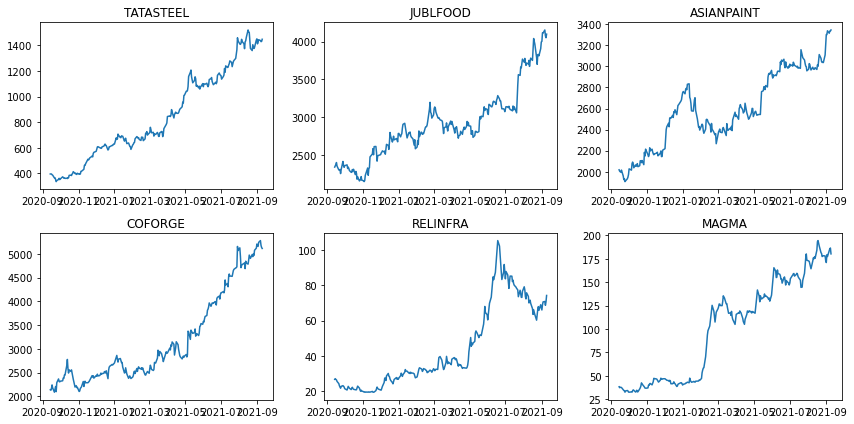

In [40]:
fig, (axs1, axs2) = plt.subplots(2,3, figsize=(12,6))
x = Company.index
axs1[0].plot(x,Company["TATASTEEL.NS"])
axs1[0].set_title('TATASTEEL')
axs2[0].plot(x ,Company["COFORGE.NS"] )
axs2[0].set_title("COFORGE")
axs1[1].plot(x, Company["JUBLFOOD.NS"])
axs1[1].set_title("JUBLFOOD")
axs2[1].plot(x, Company["RELINFRA.NS"])
axs2[1].set_title("RELINFRA")
axs1[2].plot(x, Company["ASIANPAINT.NS"])
axs1[2].set_title("ASIANPAINT")
axs2[2].plot(x, Company["MAGMA.NS"])
axs2[2].set_title("MAGMA")

fig.tight_layout()